In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("./data/wholetime.csv")

/var/folders/pm/4cgtm7w90fbgczj718s4vvk40000gn/T/ipykernel_12717/4197093779.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/wholetime.csv")


In [4]:
# Get the node_list, edge_list and timestamp
def return_nm(df):
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    # started_atで昇順にソート
    df = df.sort_values(by='started_at')
    current_timestamp = df['started_at'].min()
    end_timestamp = df["started_at"].max()
    interval = timedelta(days=1)

    node_list = []
    edge_list = []
    timestamp = []

    while current_timestamp <= end_timestamp:
        timestamp.append(current_timestamp)
        next_timestamp = current_timestamp + interval
        df_tmp = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

        # node_listにはユニークなstart_station_idを追加
        node_list.append(len(df_tmp['start_station_id'].unique()))

        # edge_listにはdf_tmpの行数を追加
        edge_list.append(len(df_tmp))

        current_timestamp = next_timestamp

    # node_listとedge_listで0の値を削除
    node_list = np.array(node_list)
    edge_list = np.array(edge_list)
    timestamp = np.array(timestamp)
    active_node_list = node_list[node_list != 0]
    edge_list = edge_list[edge_list != 0]
    timestamp = timestamp[:len(node_list)]
    
    return active_node_list, edge_list, timestamp

In [5]:
# データセットをいくつかのグループに分ける
df_p1 = df[(df['started_at'] >= '2020-03-01') & (df['started_at'] < '2020-06-01')]
df_p2 = df[(df['started_at'] >= '2020-06-01') & (df['started_at'] < '2020-11-01')]
df_p3 = df[(df['started_at'] >= '2020-11-01') & (df['started_at'] < '2021-03-01')]
df_p4 = df[(df['started_at'] >= '2021-03-01') & (df['started_at'] < '2023-10-01')]

node_list_p1, edge_list_p1, timestamp_p1 = return_nm(df_p1)
node_list_p2, edge_list_p2, timestamp_p2 = return_nm(df_p2)
node_list_p3, edge_list_p3, timestamp_p3 = return_nm(df_p3)
node_list_p4, edge_list_p4, timestamp_p4 = return_nm(df_p4)


In [14]:
# 欠損値がある行を削除
df_p1_drop = df_p1.dropna()
df_p2_drop = df_p2.dropna()
df_p3_drop = df_p3.dropna()
df_p4_drop = df_p4.dropna()

# df_p1_drop~df_p4_dropのreturn_nmを計算
node_list_p1_drop, edge_list_p1_drop, timestamp_p1_drop = return_nm(df_p1_drop)
node_list_p2_drop, edge_list_p2_drop, timestamp_p2_drop = return_nm(df_p2_drop)
node_list_p3_drop, edge_list_p3_drop, timestamp_p3_drop = return_nm(df_p3_drop)
node_list_p4_drop, edge_list_p4_drop, timestamp_p4_drop = return_nm(df_p4_drop)

In [31]:
# df_p3_dropを昇順にソート
df_p3_drop = df_p3_drop.sort_values(by='started_at')
df_p3_drop.head()

,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance,start_lat_lng,end_lat_lng
2919624,41.937582,-87.644098,300.0,Broadway & Barry Ave,2020-11-01 00:35:08,casual,D0C1A65AFC859916,docked_bike,41.937582,-87.644098,300.0,Broadway & Barry Ave,2020-11-01 00:00:08,0.000000,"(41.937582, -87.644098)","(41.937582, -87.644098)"
2794845,41.884616,-87.644571,96.0,Desplaines St & Randolph St,2020-11-01 00:02:20,member,985AD418D8ED316C,docked_bike,41.888716,-87.644447,56.0,Desplaines St & Kinzie St,2020-11-01 00:00:14,0.455486,"(41.888716, -87.644447)","(41.88461618962, -87.6445705849)"
2832724,41.954245,-87.654406,240.0,Sheridan Rd & Irving Park Rd,2020-11-01 00:06:21,member,AB459A840CF1BBF8,docked_bike,41.945529,-87.646439,303.0,Broadway & Cornelia Ave,2020-11-01 00:00:22,1.172010,"(41.945529, -87.646439)","(41.954245, -87.654406)"
2735882,41.896919,-87.635699,31.0,Franklin St & Chicago Ave,2020-11-01 00:04:45,casual,5239202FF2A38305,electric_bike,41.906758,-87.635097,291.0,Wells St & Evergreen Ave,2020-11-01 00:00:52,1.093898,"(41.90675766666666, -87.63509666666667)","(41.89691933333334, -87.6356985)"
2862343,41.897116,-87.635687,31.0,Franklin St & Chicago Ave,2020-11-01 00:04:24,member,587849ED1D5F0CBA,electric_bike,41.906695,-87.635068,291.0,Wells St & Evergreen Ave,2020-11-01 00:00:57,1.065225,"(41.906695, -87.63506833333334)","(41.89711566666666, -87.6356865)"


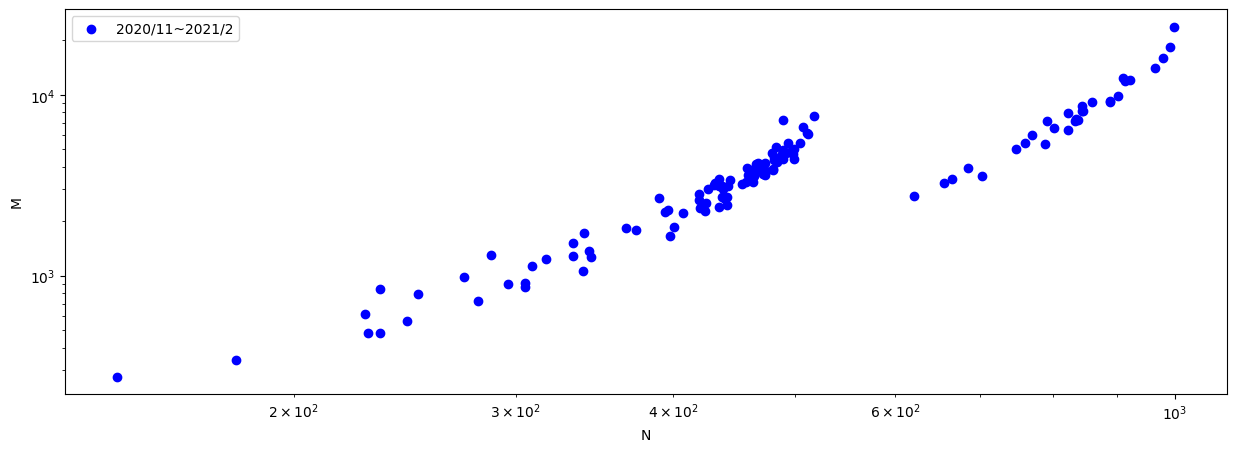

In [29]:
# node_listp3とedge_listp3をプロット
c1 = "blue"

plt.figure(figsize=(15, 5))
plt.scatter(node_list_p3, edge_list_p3, label='2020/11~2021/2', c=c1)
plt.xlabel('N')
plt.ylabel('M')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

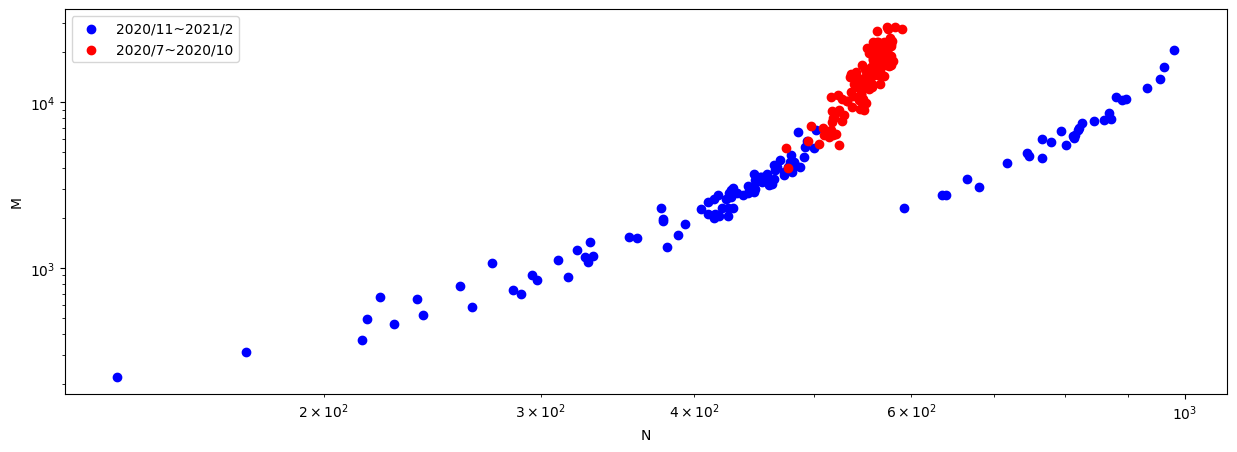

In [28]:
# node_listp3_dropとedge_listp3_dropをプロット
c1 = "blue"
c2 = "red"

plt.figure(figsize=(15, 5))
plt.scatter(node_list_p3_drop, edge_list_p3_drop, label='2020/11~2021/2', c=c1)
plt.scatter(node_list_p2_drop, edge_list_p2_drop, label='2020/7~2020/10', c=c2)
plt.xlabel('N')
plt.ylabel('M')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [18]:
# df_p3_dropを月単位で分割
df_p3_drop_1 = df_p3_drop[(df_p3_drop['started_at'] >= '2020-11-01') & (df_p3_drop['started_at'] < '2020-12-01')]
df_p3_drop_2 = df_p3_drop[(df_p3_drop['started_at'] >= '2020-12-01') & (df_p3_drop['started_at'] < '2021-01-01')]
df_p3_drop_3 = df_p3_drop[(df_p3_drop['started_at'] >= '2021-01-01') & (df_p3_drop['started_at'] < '2021-02-01')]
df_p3_drop_4 = df_p3_drop[(df_p3_drop['started_at'] >= '2021-02-01') & (df_p3_drop['started_at'] < '2021-03-01')]

In [19]:
# df_p3_drop_1~df_p3_drop_4のreturn_nmを計算
node_list_p3_drop_1, edge_list_p3_drop_1, timestamp_p3_drop_1 = return_nm(df_p3_drop_1)
node_list_p3_drop_2, edge_list_p3_drop_2, timestamp_p3_drop_2 = return_nm(df_p3_drop_2)
node_list_p3_drop_3, edge_list_p3_drop_3, timestamp_p3_drop_3 = return_nm(df_p3_drop_3)
node_list_p3_drop_4, edge_list_p3_drop_4, timestamp_p3_drop_4 = return_nm(df_p3_drop_4)


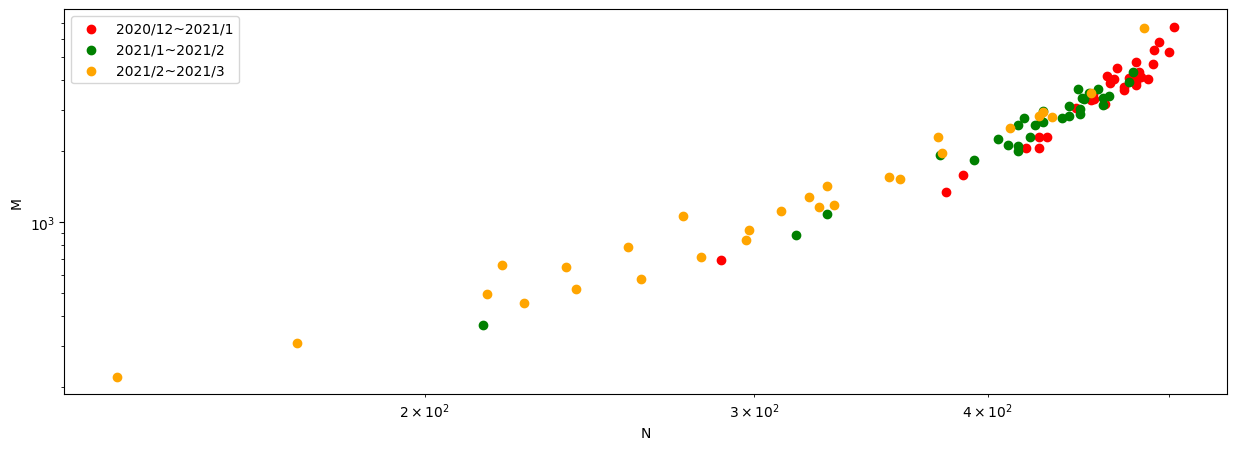

In [36]:
# node_listp3_drop_1とedge_listp3_drop_1をプロット
c1 = "blue"
c2 = "red"
c3 = "green"
c4 = "orange"

plt.figure(figsize=(15, 5))
# plt.scatter(node_list_p3_drop_1, edge_list_p3_drop_1, label='2020/11~2020/12', c=c1)
plt.scatter(node_list_p3_drop_2, edge_list_p3_drop_2, label='2020/12~2021/1', c=c2)
plt.scatter(node_list_p3_drop_3, edge_list_p3_drop_3, label='2021/1~2021/2', c=c3)
plt.scatter(node_list_p3_drop_4, edge_list_p3_drop_4, label='2021/2~2021/3', c=c4)
# plt.scatter(node_list_p1_drop, edge_list_p1_drop, label='2020/3~2020/6', c=c1)
# plt.scatter(node_list_p2_drop, edge_list_p2_drop, label='2020/6~2020/11', c=c1)
# plt.scatter(node_list_p4_drop, edge_list_p4_drop, label='2021/3~2023/9', c=c1)
plt.xlabel('N')
plt.ylabel('M')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
